#Tên Thành Viên Nhóm:
##Lê Ngọc Tồn - 18086441
##Trần Chí Hùng - 18093941
##Nguyễn Mạnh Hà - 18084821

# Bài 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 

### I.Load tập dữ liệu

In [ ]:
# I.Load tập dữ liệu
classA = scipy.io.loadmat('/content/drive/MyDrive/Nhan_Dang_Mau/Thuc_Hanh_Tren_Lop/TH_Tuan6/classA.mat')['classA']
classB = scipy.io.loadmat('/content/drive/MyDrive/Nhan_Dang_Mau/Thuc_Hanh_Tren_Lop/TH_Tuan6/classB.mat')['classB']
print('ClassA: ', classA.shape)
print('ClassB: ', classB.shape)

ClassA:  (300, 2)
ClassB:  (195, 2)


### 1. plot dữ liệu

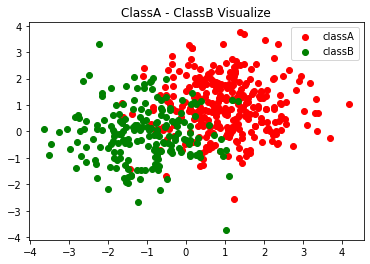

In [ ]:
# 1. plot dữ liệu
plt.scatter(classA[:,0],classA[:,1],c="red",label="classA")
plt.scatter(classB[:,0],classB[:,1],c="green",label="classB")
plt.legend(loc="best")
plt.title("ClassA - ClassB Visualize")
plt.show()

### 2.Thêm nhãn và số mẫu: 1 tương ứng class A -  2 tương ứng class B và nối 2 tập dữ liệu lại thành tập dt


In [ ]:
a = len(classA)
b = len(classB)

In [ ]:
#Tạo 2 mảng chứa label của classA và classB, với classA có label bằng 0, classB có label bằng 1
labelA = np.ones((a,1))
labelB = 2*np.ones((b,1))

In [ ]:
#Ghép label với data
classA = np.hstack((classA,labelA))
print(classA.shape)

(300, 3)


In [ ]:
classB = np.hstack((classB,labelB))
print(classB.shape)

(195, 3)


In [ ]:
#Nối classA và classB
dt = np.concatenate((classA,classB))
print(dt.shape)

(495, 3)


In [ ]:
print(dt)

[[ 0.57225718  2.17957903  1.        ]
 [ 0.42062686  1.75296775  1.        ]
 [ 1.92596838  1.48407754  1.        ]
 ...
 [-1.05738445  1.0747503   2.        ]
 [-0.80810724 -0.13569809  2.        ]
 [ 0.28127233 -0.44471087  2.        ]]


### 3. chia tập train test với train_size = 60%

In [ ]:
dt = pd.DataFrame(data=dt,columns=['X1','X2','Label'])

In [ ]:
# chuyển về dataframe để tiện tính mean ở bước sau
X_train,X_test,y_train,y_test = train_test_split(dt.iloc[:,:-1],dt.iloc[:,-1],train_size=0.6,random_state=1)

## II. Huấn luyện:

### 1. Tính mean và xác suất tiền định tập train

In [ ]:
# sau khi chia data thành train và test, chúng ta được x_train(chứa giá trị 2 đặc trưng) và y_train(chứa phân giá trị phân loại) riêng lẻ nên phải ghép lại với nhau
train_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
# tính mean của từng class theo từng đặc trưng
mean_list = np.split(train_data.groupby('Label').mean().values, [1,2])
print(mean_list[:-1])

[array([[1.06976672, 0.9639414 ]]), array([[-1.12118775, -0.07529634]])]


In [ ]:
# ma trận hiệp phương sai được cho sẵn
sigma = [[1,0], [0,1]]

In [ ]:
# tính xác suất tiền định của từng class
pi_list = dt.iloc[:,2].value_counts().values / len(dt)
print(pi_list)

[0.60606061 0.39393939]


## 2. Xây dựng biệt hàm:

In [ ]:
w1 = np.dot(np.linalg.inv(sigma),mean_list[0].T)    
w2 = np.dot(np.linalg.inv(sigma),mean_list[1].T)

In [ ]:
w_1 = (-np. dot(np.dot(mean_list[0],np.linalg.inv(sigma)), mean_list[0].T) / 2) + np.log(pi_list[0])
w_2 = (-np.dot(np.dot(mean_list[1],np.linalg.inv(sigma)), mean_list[1].T) / 2) + np.log(pi_list[1])

In [ ]:
def discriminent_func(X_test, mean_list, pi_list, sigma):
    for i in range(0, len(X_test)):
        x = X_test 
        x = x.reshape(-1,1) 
        g1 = np.dot(w1.T,x) + w_1        
        g2 = np.dot(w2.T,x) + w_2
    if g1 > g2:
        return 1
    else:
        return 2

In [ ]:
# dự đoán kết quả với bộ dữ liệu test
predict=[]
for i in range(len(X_test)):
    predict.append(discriminent_func(X_test.values[i],mean_list,pi_list,sigma))
print(predict[:10])


[2, 1, 1, 1, 2, 1, 2, 1, 1, 2]


In [ ]:
# Ma trận confusion:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(predict, y_test, labels=[1,2]),index=['Class A', 'Class B'], columns=['Class A', 'Class B']))

         Class A  Class B
Class A      101       11
Class B       12       74


In [ ]:
# tạo lưới và vẽ đồ biên phân lớp cho tập dữ liệu
N=100
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

In [ ]:
# tạo datframe test 
dt1 = np.vstack((X_test.iloc[:,0].values,X_test.iloc[:,1].values,y_test)).T
dt1 = pd.DataFrame(data=dt,columns=['X1','X2','Label'])

In [ ]:
# Tính toán giá trị lớp dự đoán cho từng giá trị trên lưới
zz = np.array( [discriminent_func(np.array([xx,yy]), mean_list, pi_list,sigma) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)

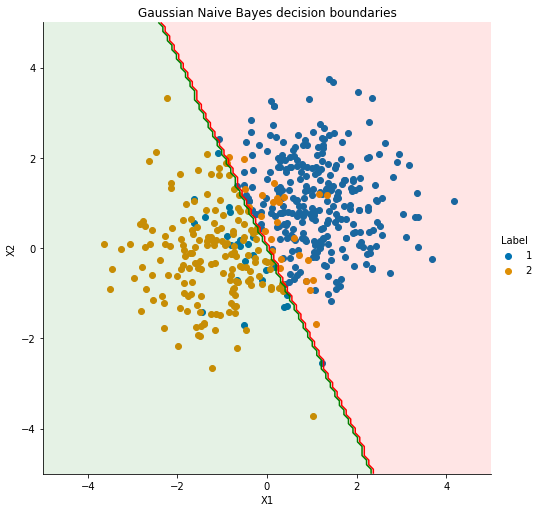

In [ ]:
# Tùy chỉnh lưới
color_list = ['Reds','Greens']
g = sns.FacetGrid(dt1, hue="Label", height=7, palette ='colorblind',
hue_order=[1,2]) .map(plt.scatter, "X1","X2",) .add_legend() 
my_ax = g.ax
# Vẽ đồ thị các đường bao và đường biên
my_ax.contourf( X, Y, Z, 1,alpha=.1,colors = ('red','green'))
my_ax.contour( X, Y, Z, 1,alpha=1,colors = ('red','green'))

# Thêm trục và tiêu đề
my_ax.set_xlabel('X1')
my_ax.set_ylabel('X2')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()


In [ ]:
confusion_matrix[0][0]: 101 - True Positive – dự đoán class 1 và giá trị tập thực tế cũng thuộc class 1
confusion_matrix[1][0]: 12   - False Negative  - dự đoán class 2 nhưng giá trị  thực tế thuộc class 1
confusion_matrix[0][1]: 11 - False Positive – dự đoán là class 1 nhưng giá trị thực tế thuộc class 2 
confusion_matrix[1][1]: 74 - True Negative – dự đoán là class 2 và giá trị thực tế cũng thuộc class 2